

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

5) Linear Regression

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [2]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [3]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print('P Value %2.5f' % p_value)

P Value 0.01379


P-value is computed as 0.01379. Comparing, 0.01379 < 0.05 (where 0.05 = alpha = level of significance) Therefore, at 0.95 level of significance, there is enough evidence to reject the null hypothesis.
Hence, we can conclude that there is significant difference between the datasets.

## Question 2 

He is trying a third GPU - GPU3.

In [4]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [5]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU3)
print('P Value %2.5f' % p_value)

P Value 0.14509


P-value is computed as 0.14509. Comparing, 0.14509 > 0.05 (where 0.05 = alpha = level of significance) Therefore, at 0.95 level of significance, there is NOT ENOUGH EVIDENCE to reject the null hypothesis.
Hence, we can conclude that there is NO SIGNIFICANT DIFFERENCE between the datasets.

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [6]:
import pandas as pd
import numpy as np

data_df = pd.DataFrame()

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

dfe1            = pd.DataFrame({'Experiment': '1', 'Values':e1})
dfe2            = pd.DataFrame({'Experiment': '2', 'Values':e2})
dfe3            = pd.DataFrame({'Experiment': '3', 'Values':e3})

data_df = data_df.append(dfe1)
data_df = data_df.append(dfe2)
data_df = data_df.append(dfe3)
data_df

,Experiment,Values
0,1,1.595440
1,1,1.419730
2,1,0.000000
3,1,0.000000
0,2,1.433800
1,2,2.079700
2,2,0.892139
3,2,2.384740
0,3,0.036930
1,3,0.938018


#### Answer:

In [7]:
data_df["Experiment"] = data_df["Experiment"].astype(int)

In [8]:
stats.levene(data_df["Experiment"], data_df["Values"])

LeveneResult(statistic=0.15488610967225758, pvalue=0.6976973209114716)

Observed p-value = 0.698. Therefore p-value > 0.05. Hence the datasets conform to the variance criteria necessary for performing ANOVA

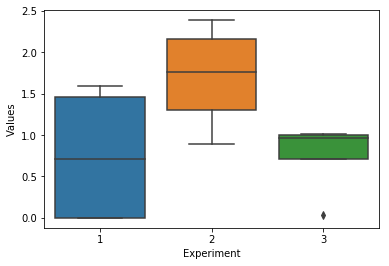

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = "Experiment", y = "Values", data = data_df)
##plt.title('Monthly income of Gym members')
plt.show()

In [10]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

mod = ols('Values ~ Experiment', data = data_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq    df        F    PR(>F)
Experiment  0.000174   1.0  0.00026  0.987458
Residual    6.693886  10.0      NaN       NaN


p value is 0.987458 and it is greater than our chosen level of signifance at 5%
Therefore, the statistical decision is to NOT REJECT the null hypothesis at 5% level of significance.
Hence it can be concluded that the results from the 3 experiments are not significantly different. 

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I Error - 

When the null hypothesis IS REJECTED when it SHOULD NOT HAVE been rejected - such an error is called Type I Error. Type I Error can be controlled by choosing the value of alpha, the level of significance, with care. Alpha is the probability of committing a Type I Error. 

TYpe II Error - 

When the null hypothesis IS NOT rejected, when in it SHOULD HAVE been rejected - such an error is Type II Error.Type II Error can be reduced by increasing the sample size. The probability of committing a Type II Error is Beta.

## Question 5 

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


Type I Error - 

A higher confidence value would result in lowered chances for Type I Error . Mathematically, it can be explained as follows - higher level of confidence indicates a lower value of alpha, the level of signigicance.

Type 2 Error - 

IF the confidence value is Higher, it would increase the chances of committing Type II Error .  

## Question 6 

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

Let GPUo be the older model & GPUn be the new model
Consideing that the expert is looking at 'better speed' when testing, let 

TAGPUn be the mean of the times after testing GPUn n number of times
TAGPUo be the mean of the times after testing GPUo n number of times

H0: TAGPUn - TAGPUo = 0 

H1: TAGPUn - TAGPUo > 0

Given that the Computer expert made a Type 1 Error. That implies that he has rejected the null hyothesis and chosen the alternative hypothesis, while he should not have rejected the null. 
Therefore, from the hypotheses fromualtion given above, he has chosen the new model GPU(GPUn), thinking that he has chosen the more effective model based on the test result.

## Question 7 

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

The expert has committed a Type II Error, which means that he has accepted the null hypothesis when it should have been rejected. 
This means that he has incorrectly concluded that the new model  IS NO MORE EFFECTIVE than the old model and thus retained the old model. 

# Linear Regression


# Simple Linear Regression

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [11]:
bigcity=pd.read_csv("bigcity.csv")
bigcity

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input and target variables into X and Y.
Hint: You can shape function to get the size of the dataframe

In [12]:
bigcity.shape

(49, 2)

In [13]:
bigcity.rename(columns={'u':'X', 'x':'Y'}, inplace=True)
bigcity

,X,Y
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [14]:
bigcity.isna()

,X,Y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [15]:
bigcity.corr()

,X,Y
X,1.000000,0.981742
Y,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = bigcity[['X']]
y = bigcity[['Y']]
##Splitting the data into training & testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [17]:
x_train.shape

(39, 1)

In [18]:
x_test.shape

(10, 1)

In [19]:
##performing the training operation
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [20]:
b0 = linreg.intercept_
print(b0)

[9.71845532]


In [21]:
b1 = linreg.coef_
print(b1)

[[1.15945123]]


# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

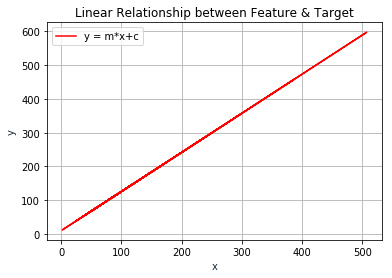

In [22]:
##plotting the line with the computed values of slope & intercept
y = linreg.coef_*x+ linreg.intercept_
plt.plot(x, y, '-r', label='y = m*x+c')
plt.title('Linear Relationship between Feature & Target')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
predictedpop = linreg.predict(x_train)

In [25]:
mse = mean_squared_error(predictedpop, y_train)

In [26]:
rmse = np.sqrt(mse)
rmse 

23.18943724391406

## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [27]:
linreg.score(x_train, y_train)

0.9682175540860046

In [28]:
linreg.score(x_test, y_test)

0.9181922560396981